# Text Data Loading, Creating a DataFrame

In [78]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
import os
from textblob import TextBlob
import datetime as dt
from wordcloud import WordCloud
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [79]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [80]:
# Import csv file into a dataframe
df_hourly = pd.read_csv('./Resources/Hourly_Data_by_year.csv')

In [81]:
# convert the timezone to CST
df_hourly['Datetime'] = pd.to_datetime(df_hourly['Datetime'], utc=True)
df_hourly['Datetime'] = pd.DatetimeIndex(df_hourly['Datetime']).tz_convert('US/Central')

In [82]:
df_hourly.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2019-10-16 08:30:00-05:00,51.478004,52.176003,51.384003,52.000000,52.000000,1836189
1,2019-10-16 09:30:00-05:00,51.990002,52.420002,51.917999,52.115639,52.115639,1452155
2,2019-10-16 10:30:00-05:00,52.111736,52.308002,52.020000,52.118000,52.118000,797078
3,2019-10-16 11:30:00-05:00,52.144001,52.167999,51.920002,52.070000,52.070000,482371
4,2019-10-16 12:30:00-05:00,52.058002,52.121998,51.487541,51.514000,51.514000,774074


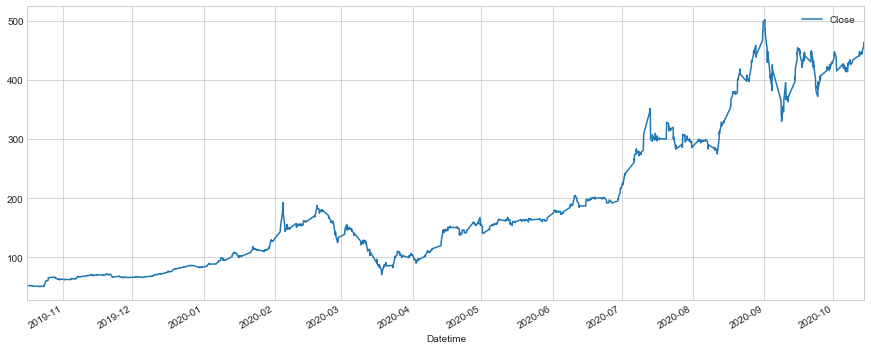

In [83]:
df_hourly.plot(x='Datetime', y='Close', figsize=(15,6));

In [84]:
# Import csv file into a dataframe
df_daily = pd.read_csv('./Resources/Daily_trading_data.txt', sep=',')

In [85]:
df_daily.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-01-02,62.400002,64.421997,62.200001,64.106003,21761000,0,0.0
1,2018-01-03,64.199997,65.050003,63.110001,63.450001,22607500,0,0.0
2,2018-01-04,62.574001,63.709999,61.136002,62.924000,49731500,0,0.0
3,2018-01-05,63.324001,63.448002,62.400002,63.316002,22956000,0,0.0
4,2018-01-08,63.200001,67.403999,63.099998,67.281998,49297000,0,0.0


In [86]:
# parsing the dates into datetime and changing the format.
df_daily['Date'] = pd.to_datetime(df_daily['Date']).dt.date
# rename the column
df_daily= df_daily.rename(columns ={'Date':'date'})

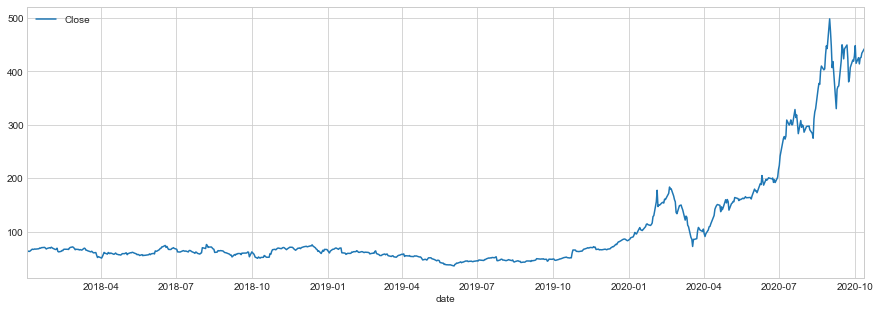

In [87]:
df_daily.plot(x='date', y='Close', figsize=(15,5));

In [88]:
# Import a text file to analyze
df_elon = pd.read_csv('./Resources/Elon_Musk_tweets_cst.csv')
df_elon.head()

,date,text,Subjectivity,Polarity,Analysis
0,2020-08-16 03:42:01+00:00,we must pass the great filter,0.750000,0.800000,Positive
1,2020-10-09 15:00:00+00:00,the future of cars can and will be electric if...,0.368750,0.075000,Positive
2,2020-10-08 09:36:14+00:00,we put the 2020 model y long range electric s...,0.400000,-0.050000,Negative
3,2020-10-07 17:47:59+00:00,"starman, last seen leaving earth, made its fir...",0.133333,0.083333,Positive
4,2020-10-06 07:33:30+00:00,deployment of 60 starlink satellites confirmed,1.000000,0.400000,Positive


In [89]:
df_elon['date'] = pd.to_datetime(df_elon['date']).dt.date

In [90]:
df_elon.head()

,date,text,Subjectivity,Polarity,Analysis
0,2020-08-16,we must pass the great filter,0.750000,0.800000,Positive
1,2020-10-09,the future of cars can and will be electric if...,0.368750,0.075000,Positive
2,2020-10-08,we put the 2020 model y long range electric s...,0.400000,-0.050000,Negative
3,2020-10-07,"starman, last seen leaving earth, made its fir...",0.133333,0.083333,Positive
4,2020-10-06,deployment of 60 starlink satellites confirmed,1.000000,0.400000,Positive


## Labelling price increase or decrease by interval

In [91]:
df_daily['daily return'] = df_daily['Close'].pct_change()
df_hourly['hourly return'] = df_hourly['Close'].pct_change()

In [92]:
df_daily.head()

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily return
0,2018-01-02,62.400002,64.421997,62.200001,64.106003,21761000,0,0.0,NaN
1,2018-01-03,64.199997,65.050003,63.110001,63.450001,22607500,0,0.0,-0.010233
2,2018-01-04,62.574001,63.709999,61.136002,62.924000,49731500,0,0.0,-0.008290
3,2018-01-05,63.324001,63.448002,62.400002,63.316002,22956000,0,0.0,0.006230
4,2018-01-08,63.200001,67.403999,63.099998,67.281998,49297000,0,0.0,0.062638


In [93]:
# create a column containing 
def getLabel(score):
    if score <= 0:
        return 'down'
    else:
        return 'up'

df_daily['price label'] = df_daily['daily return'].apply(getLabel)
df_daily.head(10)

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily return,price label
0,2018-01-02,62.400002,64.421997,62.200001,64.106003,21761000,0,0.0,NaN,up
1,2018-01-03,64.199997,65.050003,63.110001,63.450001,22607500,0,0.0,-0.010233,down
2,2018-01-04,62.574001,63.709999,61.136002,62.924000,49731500,0,0.0,-0.008290,down
3,2018-01-05,63.324001,63.448002,62.400002,63.316002,22956000,0,0.0,0.006230,up
4,2018-01-08,63.200001,67.403999,63.099998,67.281998,49297000,0,0.0,0.062638,up
5,2018-01-09,67.031998,67.760002,65.480003,66.737999,35733000,0,0.0,-0.008085,down
6,2018-01-10,66.440002,67.400002,66.000000,66.959999,21549500,0,0.0,0.003326,up
7,2018-01-11,67.047997,68.961998,66.652000,67.589996,33227500,0,0.0,0.009409,up
8,2018-01-12,67.725998,68.082001,66.734001,67.244003,24125500,0,0.0,-0.005119,down
9,2018-01-16,67.508003,69.000000,66.959999,68.012001,32371500,0,0.0,0.011421,up


In [94]:
# Or add a column with binary number.
def getBinary(score):
    if score <= 0:
        return 0
    else:
        return 1

df_daily['price label number'] = df_daily['daily return'].apply(getBinary)
df_daily.head(10)

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily return,price label,price label number
0,2018-01-02,62.400002,64.421997,62.200001,64.106003,21761000,0,0.0,NaN,up,1
1,2018-01-03,64.199997,65.050003,63.110001,63.450001,22607500,0,0.0,-0.010233,down,0
2,2018-01-04,62.574001,63.709999,61.136002,62.924000,49731500,0,0.0,-0.008290,down,0
3,2018-01-05,63.324001,63.448002,62.400002,63.316002,22956000,0,0.0,0.006230,up,1
4,2018-01-08,63.200001,67.403999,63.099998,67.281998,49297000,0,0.0,0.062638,up,1
5,2018-01-09,67.031998,67.760002,65.480003,66.737999,35733000,0,0.0,-0.008085,down,0
6,2018-01-10,66.440002,67.400002,66.000000,66.959999,21549500,0,0.0,0.003326,up,1
7,2018-01-11,67.047997,68.961998,66.652000,67.589996,33227500,0,0.0,0.009409,up,1
8,2018-01-12,67.725998,68.082001,66.734001,67.244003,24125500,0,0.0,-0.005119,down,0
9,2018-01-16,67.508003,69.000000,66.959999,68.012001,32371500,0,0.0,0.011421,up,1


In [95]:
# Merging the dataframes by using reduce function
from functools import reduce
data_frames = [df_daily, df_elon]
df = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), data_frames)
df.head()

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily return,price label,price label number,text,Subjectivity,Polarity,Analysis
0,2018-01-02,62.400002,64.421997,62.200001,64.106003,21761000.0,0.0,0.0,NaN,up,1.0,NaN,NaN,NaN,NaN
1,2018-01-03,64.199997,65.050003,63.110001,63.450001,22607500.0,0.0,0.0,-0.010233,down,0.0,NaN,NaN,NaN,NaN
2,2018-01-04,62.574001,63.709999,61.136002,62.924000,49731500.0,0.0,0.0,-0.008290,down,0.0,NaN,NaN,NaN,NaN
3,2018-01-05,63.324001,63.448002,62.400002,63.316002,22956000.0,0.0,0.0,0.006230,up,1.0,NaN,NaN,NaN,NaN
4,2018-01-08,63.200001,67.403999,63.099998,67.281998,49297000.0,0.0,0.0,0.062638,up,1.0,NaN,NaN,NaN,NaN


In [96]:
# Drop unnecessary columns
df = df.drop(columns = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])

In [97]:
df.head()

,date,Close,daily return,price label,price label number,text,Subjectivity,Polarity,Analysis
0,2018-01-02,64.106003,NaN,up,1.0,NaN,NaN,NaN,NaN
1,2018-01-03,63.450001,-0.010233,down,0.0,NaN,NaN,NaN,NaN
2,2018-01-04,62.924000,-0.008290,down,0.0,NaN,NaN,NaN,NaN
3,2018-01-05,63.316002,0.006230,up,1.0,NaN,NaN,NaN,NaN
4,2018-01-08,67.281998,0.062638,up,1.0,NaN,NaN,NaN,NaN


## Analysis

### 1. Using daily mean 

In [98]:
df_mean = df.groupby(['date']).mean()

In [99]:
df_mean.tail()

,Close,daily return,price label number,Subjectivity,Polarity
date,,,,,
2020-10-06,413.980011,-0.027485,0.0,0.600000,0.266667
2020-10-07,425.299988,0.027344,1.0,0.133333,0.083333
2020-10-08,425.920013,0.001458,1.0,0.400000,-0.050000
2020-10-09,434.000000,0.018971,1.0,0.368750,0.075000
2020-10-12,442.299988,0.019124,1.0,NaN,NaN


In [71]:
# Scaling Polarity score for better comparison plot(optional)
# df_mean['Polarity'] = df_mean['Polarity']

In [72]:
import hvplot.pandas
df_mean.hvplot(x='date', y='Close') * df_mean.hvplot(x='date', y='Polarity')

:Overlay
   .Curve.I  :Curve   [date]   (Close)
   .Curve.II :Curve   [date]   (Polarity)

In [100]:
df_mean.hvplot(x='date', y='daily return') * df_mean.hvplot(x='date', y='Polarity')

:Overlay
   .Curve.I  :Curve   [date]   (daily return)
   .Curve.II :Curve   [date]   (Polarity)

In [101]:
correlation = df_mean.corr()
correlation

,Close,daily return,price label number,Subjectivity,Polarity
Close,1.000000,0.100240,0.095535,-0.040420,-0.023992
daily return,0.100240,1.000000,0.671881,-0.015048,-0.001902
price label number,0.095535,0.671881,1.000000,0.063711,0.083665
Subjectivity,-0.040420,-0.015048,0.063711,1.000000,0.530144
Polarity,-0.023992,-0.001902,0.083665,0.530144,1.000000
